In [5]:
import seaborn as sns
from astropy.io import fits
from multiprocessing import Pool
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy.stats import binned_statistic_2d
from astropy.table import Table
from utils import load_datasets
plt.rcParams['axes.linewidth']= 3.
plt.rcParams['axes.titlepad'] = 20
plt.rcParams['axes.linewidth']=5
plt.rcParams['xtick.major.size'] =15
plt.rcParams['ytick.major.size'] =15
plt.rcParams['xtick.minor.size'] =10
plt.rcParams['ytick.minor.size'] =10
plt.rcParams['xtick.major.width'] =5
plt.rcParams['ytick.major.width'] =5
plt.rcParams['xtick.minor.width'] =5
plt.rcParams['ytick.minor.width'] =5
plt.rcParams['font.size'] = 40
plt.rcParams['figure.figsize'] = (16,16)



In [2]:
SDSS, TNG50, TNG, Illustris = load_datasets(orig=True)

In [3]:


SDSS_cen = SDSS.query('LCentSat==1')
TNG_cen = TNG.query('LCentSat==1')
TNG50_cen = TNG50.query('LCentSat==1')
Illustris_cen = Illustris.query('LCentSat==1')

SDSS_sat = SDSS.query('LCentSat==0')
TNG_sat = TNG.query('LCentSat==0')
TNG50_sat = TNG50.query('LCentSat==0')
Illustris_sat = Illustris.query('LCentSat==0')

SDSS_Q = SDSS.query('sSFR<-11')
SDSS_SF = SDSS.query('sSFR>-11')

TNG_Q = TNG.query('sSFR<-11')
TNG_SF = TNG.query('sSFR>-11')

TNG50_Q = TNG50.query('sSFR<-11')
TNG50_SF = TNG50.query('sSFR>-11')

Illustris_Q = Illustris.query('sSFR<-11')
Illustris_SF = Illustris.query('sSFR>-11')


SDSS_cen_Q = SDSS_cen.query('sSFR<-11') #ToDo: TNG50 SF & Q; cen & sat
TNG_cen_Q = TNG_cen.query('sSFR<-11')
TNG50_cen_Q = TNG50_cen.query('sSFR<-11')
Illustris_cen_Q = Illustris_cen.query('sSFR<-11')

SDSS_sat_Q = SDSS_sat.query('sSFR<-11')
TNG_sat_Q = TNG_sat.query('sSFR<-11')
TNG50_sat_Q = TNG50_sat.query('sSFR<-11')
Illustris_sat_Q = Illustris_sat.query('sSFR<-11')

SDSS_cen_SF = SDSS_cen.query('sSFR>-11')
TNG_cen_SF = TNG_cen.query('sSFR>-11')
TNG50_cen_SF = TNG50_cen.query('sSFR>-11')
Illustris_cen_SF = Illustris_cen.query('sSFR>-11')

SDSS_sat_SF = SDSS_sat.query('sSFR>-11')
TNG_sat_SF = TNG_sat.query('sSFR>-11')
TNG50_sat_SF = TNG50_sat.query('sSFR>-11')
Illustris_sat_SF = Illustris_sat.query('sSFR>-11')

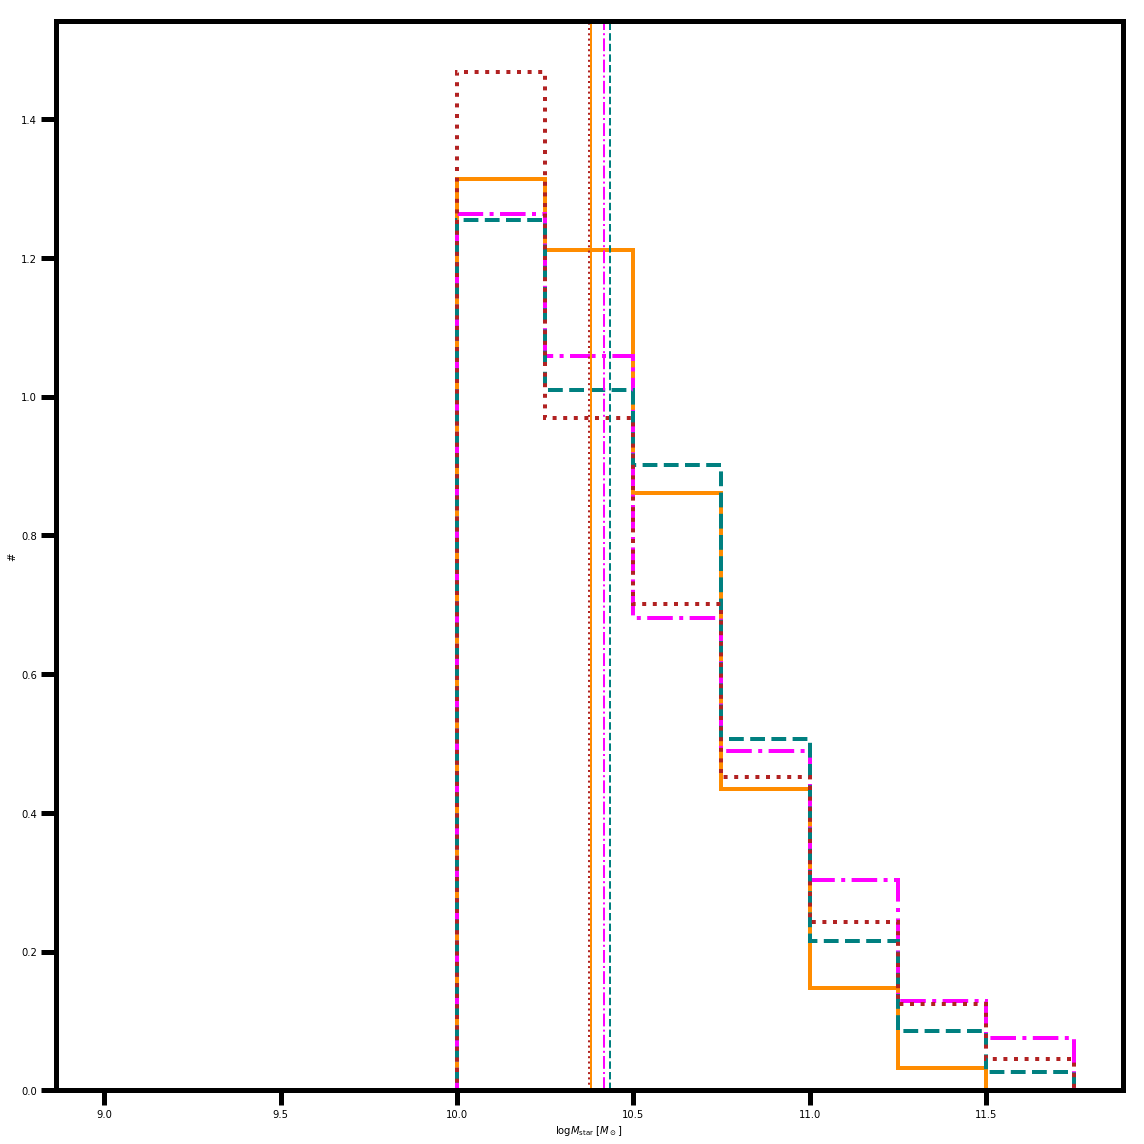

In [4]:
fig,ax1 = plt.subplots(1,1,figsize=(16,16))
bins = np.arange(9,12,0.25)
SDSS.query('Mstar>10')['Mstar'].hist(bins=bins, color='darkorange',lw=4, histtype='step', density=True,ax=ax1, ls='-')
TNG50.query('Mstar>10')['Mstar'].hist(bins=bins, color='magenta',lw=4, histtype='step', density=True,ax=ax1,ls='-.')
TNG.query('Mstar>10')['Mstar'].hist(bins=bins, color='teal',lw=4, histtype='step', density=True,ax=ax1, ls='--')
Illustris.query('Mstar>10')['Mstar'].hist(bins=bins, color='firebrick',lw=4, histtype='step', density=True,ax=ax1, ls=':')
ax1.axvline(SDSS.query('Mstar>10')['Mstar'].median(),color='darkorange',lw=2,  ls='-')
ax1.axvline(TNG50.query('Mstar>10')['Mstar'].median(),color='magenta',lw=2,ls='-.')
ax1.axvline(TNG.query('Mstar>10')['Mstar'].median(),color='teal',lw=2,ls='--')
ax1.axvline(Illustris.query('Mstar>10')['Mstar'].median(),color='firebrick',lw=2,ls=':')
plt.grid(False)
plt.xlabel(r'$\log{M_{\rm star}} \ [M_\odot]$')
plt.ylabel('#')
plt.tight_layout()
plt.savefig('./SMFs/SMF_all_gt10.pdf')

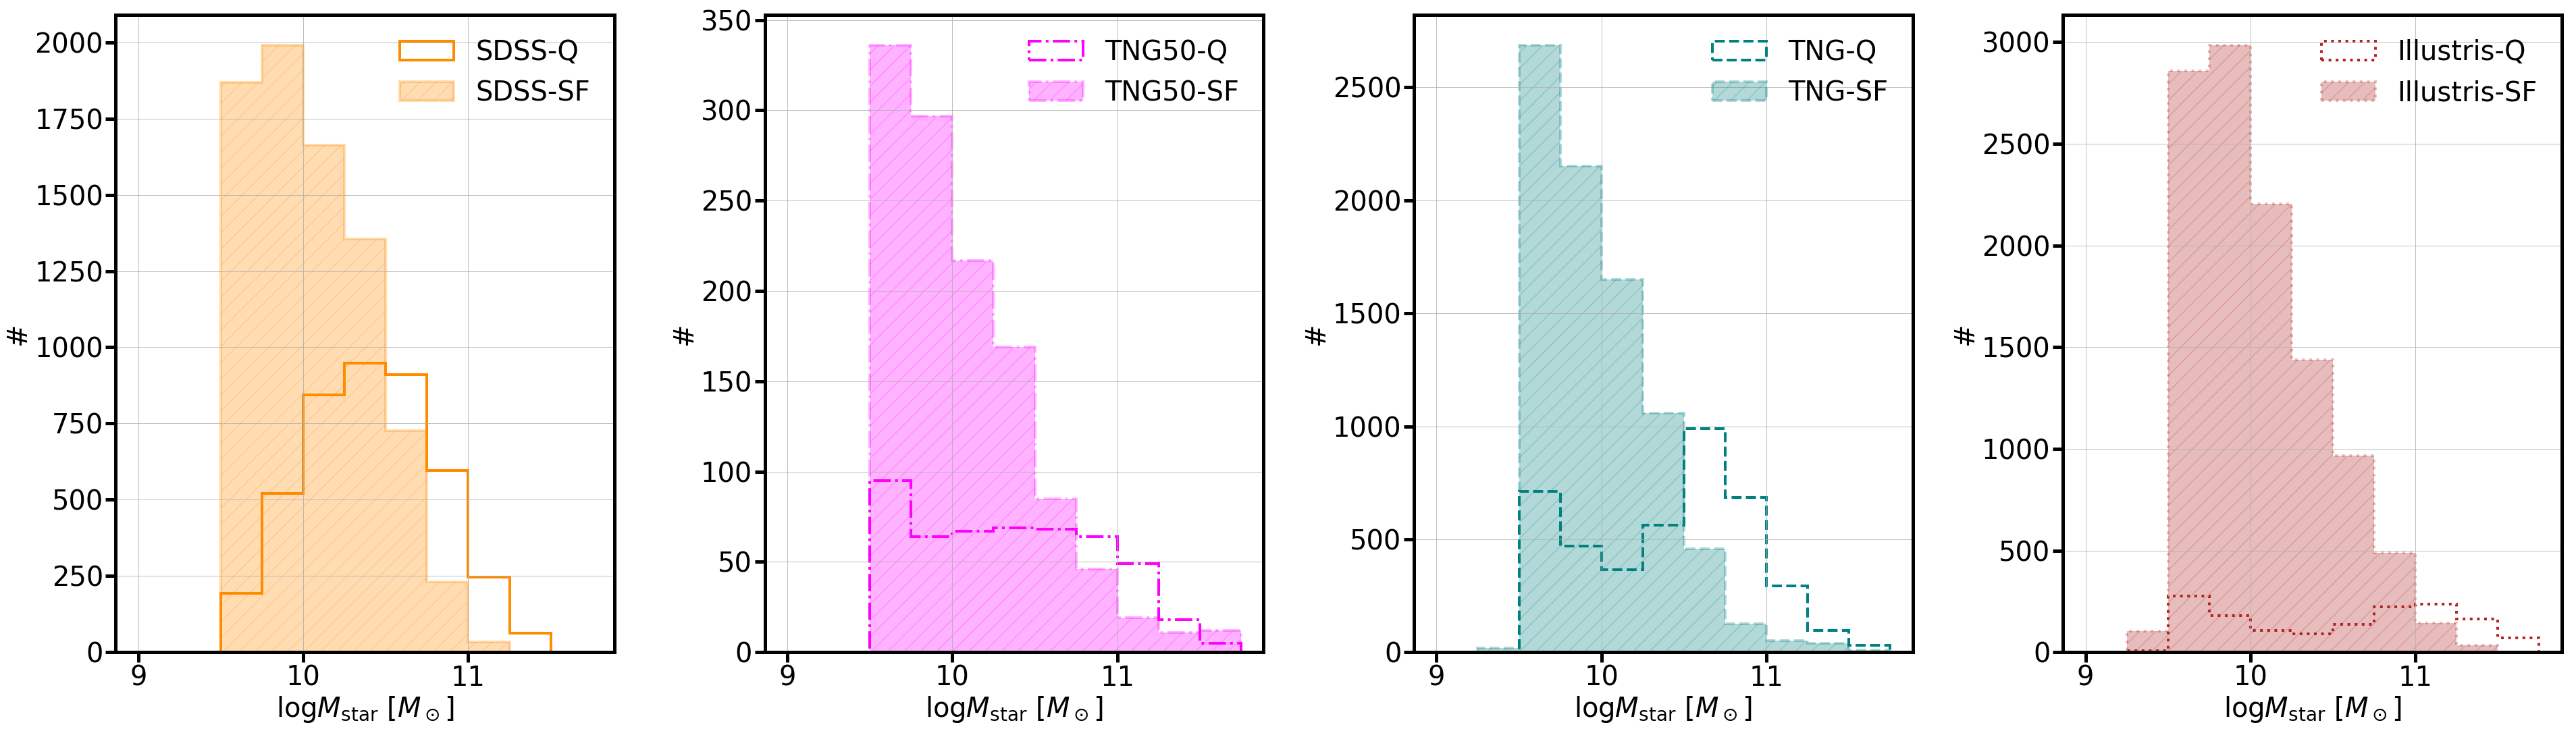

In [6]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(54,16))

bins = np.arange(9,12,0.25)
SDSS_Q['Mstar'].hist(bins=bins, color='darkorange',lw=4, histtype='step', density=False,ax=ax1, ls='-', label='SDSS-Q')
SDSS_SF['Mstar'].hist(bins=bins, color='darkorange',lw=4, histtype='step',hatch='/',facecolor='darkorange',fill=True,\
                      density=False,ax=ax1, ls='-', alpha=0.3, label='SDSS-SF')

TNG50_Q['Mstar'].hist(bins=bins, color='magenta',lw=4, histtype='step', density=False,ax=ax2,ls='-.', label='TNG50-Q')
TNG50_SF['Mstar'].hist(bins=bins, color='magenta',lw=4, histtype='step',hatch='/',facecolor='magenta',fill=True,\
                      density=False,ax=ax2, ls='-.', alpha=0.3,label='TNG50-SF')

TNG_Q['Mstar'].hist(bins=bins, color='teal',lw=4, histtype='step', density=False,ax=ax3,ls='--', label='TNG-Q')
TNG_SF['Mstar'].hist(bins=bins, color='teal',lw=4, histtype='step',hatch='/',facecolor='teal',fill=True,\
                      density=False,ax=ax3, ls='--', alpha=0.3,label='TNG-SF')
Illustris_Q['Mstar'].hist(bins=bins, color='firebrick',lw=4, histtype='step', density=False,ax=ax4,ls=':', label='Illustris-Q')
Illustris_SF['Mstar'].hist(bins=bins, color='firebrick',lw=4, histtype='step',hatch='/',facecolor='firebrick',fill=True,\
                      density=False,ax=ax4, ls=':', alpha=0.3,label='Illustris-SF')

ax1.legend(frameon=False)
ax2.legend(frameon=False)
ax3.legend(frameon=False)
ax4.legend(frameon=False)

ax1.set_ylabel('#')
ax2.set_ylabel('#')
ax3.set_ylabel('#')
ax4.set_ylabel('#')

ax1.set_xlabel(r'$\log{M_{\rm star}} \ [M_\odot]$')
ax2.set_xlabel(r'$\log{M_{\rm star}} \ [M_\odot]$')
ax3.set_xlabel(r'$\log{M_{\rm star}} \ [M_\odot]$')
ax4.set_xlabel(r'$\log{M_{\rm star}} \ [M_\odot]$')
fig.tight_layout()
fig.savefig('./SMFs/SF_Q.pdf')

/scratch/lzanisi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/scratch/lzanisi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


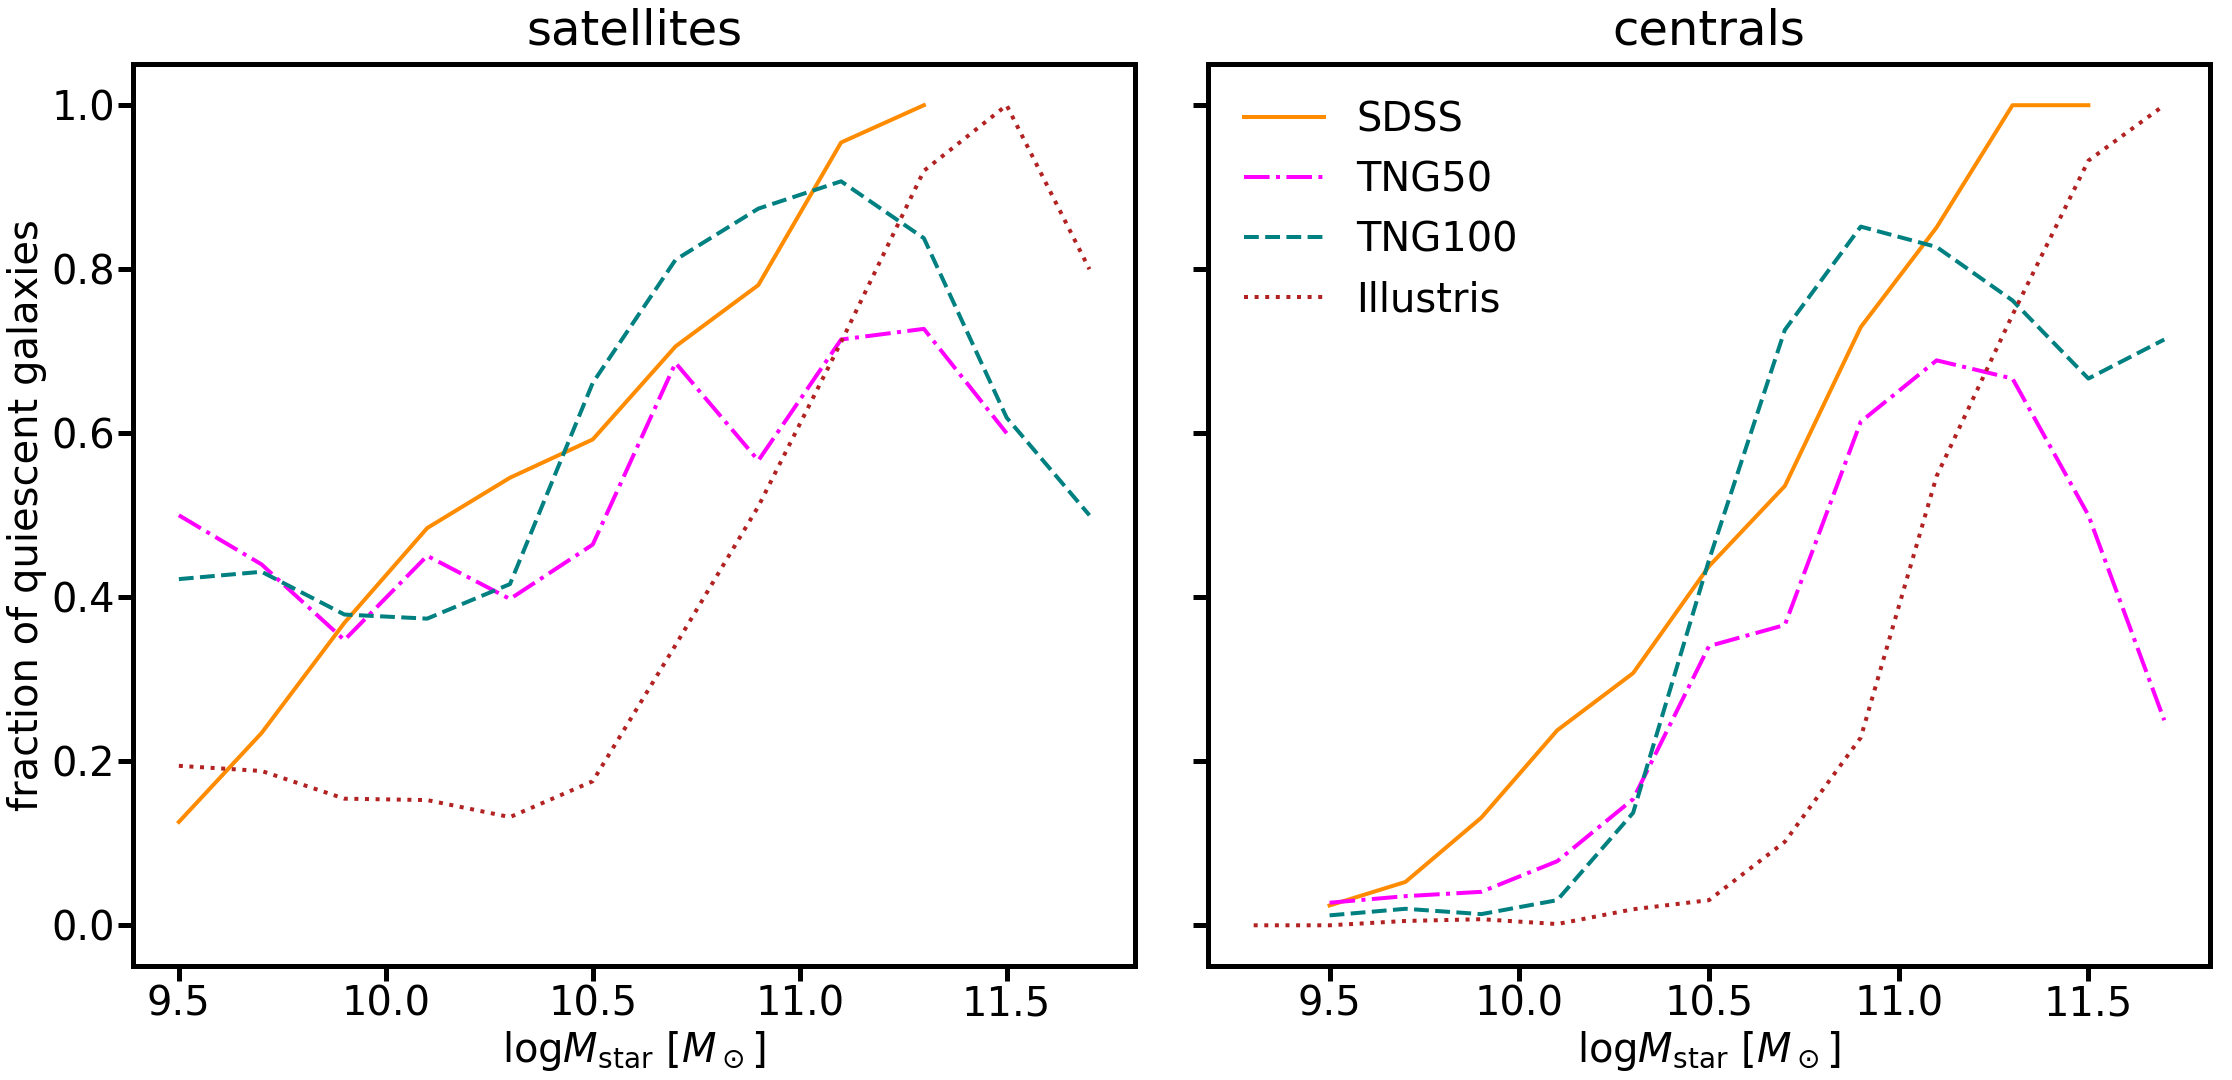

In [15]:
bins = np.arange(9,12,0.2)
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True, figsize=(32,16))
for dset, (lab, col, facecol,ls) in zip([SDSS.query('LLR<500'),TNG50,TNG, Illustris], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'],['moccasin','none','cyan','salmon'],\
                                        ['-','-.','--',':'])):
        hq = np.histogram(dset.query('sSFR<-11 & LCentSat==0')['Mstar'], bins=bins)[0]
        h = np.histogram(dset.query('LCentSat==0')['Mstar'], bins=bins)[0]
        ax1.plot(bins[1:]-0.1,hq/h, label=lab, color=col, ls=ls, lw=4)
        ax1.set_title('satellites')
        hq = np.histogram(dset.query('sSFR<-11 & LCentSat==1')['Mstar'], bins=bins)[0]
        h = np.histogram(dset.query('LCentSat==1')['Mstar'], bins=bins)[0]
        ax2.plot(bins[1:]-0.1,hq/h, label=lab, color=col, ls=ls, lw=4)
        ax2.set_title('centrals')
        
ax1.set_xlabel(r'$\log{M_{\rm star}} \ [M_\odot]$')
ax2.set_xlabel(r'$\log{M_{\rm star}} \ [M_\odot]$')
ax1.set_ylabel('fraction of quiescent galaxies')
#plt.title('satellites only')
plt.legend(frameon=False)
fig.tight_layout()
fig.savefig('./SMFs/frac_quiesc_censat.pdf')